# Pandas

- Analyse 2D or multi dimensional data
- table like data
- internally they use numpy

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\e1005283\appdata\local\programs\python\python310\lib\site-packages (2.2.1)




[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## creating data

- dictionaries 
- import from csv files

- final data will be a dataframe (table)

In [2]:
import pandas as pd


In [3]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 34, 29, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}

In [4]:
df = pd.DataFrame(data)

df

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris
2,Peter,29,Berlin
3,Linda,32,London


In [5]:
#Filtering column
df['Name']

0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object

In [6]:
#Filtering rows
df.head(2)

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris


## Info
- feel for the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [8]:
df.shape # how many rows, columns

df.dtypes # which data type per column

Name    object
Age      int64
City    object
dtype: object

In [9]:
df.columns # column names

Index(['Name', 'Age', 'City'], dtype='object')

In [10]:
df.describe() # gives you really good info about int and float columns | numeric 
df.describe(include='all') # info about all columns including objects

,Name,Age,City
count,4,4.000000,4
unique,4,NaN,4
top,John,NaN,New York
freq,1,NaN,1
mean,NaN,30.750000,NaN
std,NaN,2.753785,NaN
min,NaN,28.000000,NaN
25%,NaN,28.750000,NaN
50%,NaN,30.500000,NaN
75%,NaN,32.500000,NaN


In [11]:
tips_df = pd.read_csv("./tips.csv")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
tips_df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## task - select day, time, tip

In [13]:
tips_df[["day", "time", "tip"]].head(5) # 3 columns plus first 5 rows

,day,time,tip
0,Sun,Dinner,1.01
1,Sun,Dinner,1.66
2,Sun,Dinner,3.50
3,Sun,Dinner,3.31
4,Sun,Dinner,3.61


In [14]:
tips_df["tips_per_person"] = tips_df['tip'] / tips_df['size'] # new column
tips_df

,total_bill,tip,sex,smoker,day,time,size,tips_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000


In [15]:
tips_df.tail(5) #last 5 rows 

,total_bill,tip,sex,smoker,day,time,size,tips_per_person
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000
243,18.78,3.00,Female,No,Thur,Dinner,2,1.500000


## Find how muhc percentage people are tipping
- percentage
- add it as another column

In [16]:
tips_df["tipping_percentage"] = (tips_df['tip'] / tips_df['total_bill']) * 100
tips_df["tipping_percentage"].round(2)
tips_df


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000,9.820426


In [17]:
tips_df.sort_values(by="total_bill") # sorting the row ascending 

tips_df.sort_values(by="tip", ascending=False) # sorting the row desc 


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.333333,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,2.250000,18.621974
23,39.42,7.58,Male,No,Sat,Dinner,4,1.895000,19.228818
59,48.27,6.73,Male,No,Sat,Dinner,4,1.682500,13.942407
141,34.30,6.70,Male,No,Thur,Lunch,6,1.116667,19.533528
...,...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.500000,7.936508
111,7.25,1.00,Female,No,Sat,Dinner,1,1.000000,13.793103
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.000000,32.573290


## filter the rows where people dined on Sunday

In [18]:
tips_df[tips_df['day'] == 'Sun'].sort_values(by='day')

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
165,24.52,3.48,Male,No,Sun,Dinner,3,1.160000,14.192496
164,17.51,3.00,Female,Yes,Sun,Dinner,2,1.500000,17.133067
163,13.81,2.00,Male,No,Sun,Dinner,2,1.000000,14.482259
162,16.21,2.00,Female,No,Sun,Dinner,3,0.666667,12.338063
...,...,...,...,...,...,...,...,...,...
44,30.40,5.60,Male,No,Sun,Dinner,4,1.400000,18.421053
43,9.68,1.32,Male,No,Sun,Dinner,2,0.660000,13.636364
42,13.94,3.06,Male,No,Sun,Dinner,2,1.530000,21.951220
49,18.04,3.00,Male,No,Sun,Dinner,2,1.500000,16.629712


## get the rows where person have tipped more than R10 on a Wednesday

In [19]:
tips_friday = tips_df[tips_df['day'] == 'Fri']
tips_more_than_three = tips_friday[tips_df['tip'] > 3]

tips_more_than_three = tips_friday[tips_df['tip'] > 3].value_counts() # gives what is true and what is false in counts and sorts in desc

tips_more_than_three


C:\Users\E1005283\AppData\Local\Temp\ipykernel_9816\448729267.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips_more_than_three = tips_friday[tips_df['tip'] > 3]
C:\Users\E1005283\AppData\Local\Temp\ipykernel_9816\448729267.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips_more_than_three = tips_friday[tips_df['tip'] > 3].value_counts() # gives what is true and what is false in counts and sorts in desc


total_bill  tip   sex     smoker  day  time    size  tips_per_person  tipping_percentage
13.42       3.48  Female  Yes     Fri  Lunch   2     1.7400           25.931446             1
16.32       4.30  Female  Yes     Fri  Dinner  2     2.1500           26.348039             1
22.49       3.50  Male    No      Fri  Dinner  2     1.7500           15.562472             1
22.75       3.25  Female  No      Fri  Dinner  2     1.6250           14.285714             1
27.28       4.00  Male    Yes     Fri  Dinner  2     2.0000           14.662757             1
40.17       4.73  Male    Yes     Fri  Dinner  4     1.1825           11.774956             1
Name: count, dtype: int64

In [21]:
tips_more_than_three.sort_values('tip', ascending=False).head(5)

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
tips_large_party = tips_df[(tips_df["size"] >= 5) | (tips_df["total_bill"] >= 35)]
tips_large_party

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
11,35.26,5.00,Female,No,Sun,Dinner,4,1.250000,14.180374
23,39.42,7.58,Male,No,Sat,Dinner,4,1.895000,19.228818
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.750000,7.892660
59,48.27,6.73,Male,No,Sat,Dinner,4,1.682500,13.942407
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.182500,11.774956
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.643341
112,38.07,4.00,Male,No,Sun,Dinner,3,1.333333,10.506961
125,29.80,4.20,Female,No,Thur,Lunch,6,0.700000,14.093960
141,34.30,6.70,Male,No,Thur,Lunch,6,1.116667,19.533528
142,41.19,5.00,Male,No,Thur,Lunch,5,1.000000,12.138869


## Data exploration 
- giving valuable feedback from the data to the company

## Summarization

- filter rows, columns 
- limit | head, tail
- sort_values
- coditionals with operators -> & and |


## Slicing is pandas   
- loc
- iloc - index 
- difference

In [ ]:
tips_df.head(6)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,1.177500,18.623962


In [ ]:
tips_df.iloc[3] # based on rows number
tips_df.iloc[3:5] # both rows 3 and 4, excludes 5



,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.680765


In [ ]:
tips_df.loc[3]
tips_df.loc[3:5] # looking for these values 3, 4, 5

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,1.1775,18.623962


In [ ]:
# tips_df.tail(6).loc[1] - error
tips_df.tail(6).loc[239:241] # match the value not the row position
tips_df.tail(6).iloc[1] # match the index in the selected rows -> starts at 0!

total_bill                29.03
tip                        5.92
sex                        Male
smoker                       No
day                         Sat
time                     Dinner
size                          3
tips_per_person        1.973333
tipping_percentage    20.392697
Name: 239, dtype: object

In [ ]:
tips_df.tail(6).loc[239:241, 'tip'] # filter row, 'column'
tips_df.tail(6).loc[239:241, ['tip', 'size']] 
tips_df.tail(6).loc[239:241,'tip':'day']

,tip,sex,smoker,day
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat


In [ ]:
tips_df.tail(6).iloc[2:4, 1:5] # slicing through to get specific columns through index

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


# Task
- find the rows with highest tip_percentage skip the first 5 on a result on a weekend 

In [ ]:
tips_summary = tips_df.sort_values('tipping_percentage', ascending=False).iloc[5:][(tips_df['day'] == 'Sat') | (tips_df['day'] == 'Sun')]
tips_summary


C:\Users\E1005283\AppData\Local\Temp\ipykernel_24304\1987312701.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips_summary = tips_df.sort_values('tipping_percentage', ascending=False).iloc[5:][(tips_df['day'] == 'Sat') | (tips_df['day'] == 'Sun')]


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.952481
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.267250
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.217745
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.166264
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.781213
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.565988
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.679667
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.643341


In [ ]:
# another way using isin()

tips_df[tips_df['day'].isin(['Sun', 'Sat'])].sort_values(by='tipping_percentage', ascending=False).iloc[5:]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tipping_percentage
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.952481
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.267250
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.217745
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.166264
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.781213
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.565988
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.679667
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.643341


In [ ]:
tips_summary.loc[:, ['tipping_percentage', 'day', 'tip', 'total_bill']]

,tipping_percentage,day,tip,total_bill
109,27.952481,Sat,4.00,14.31
51,25.267250,Sun,2.60,10.29
181,24.217745,Sun,5.65,23.33
185,24.166264,Sun,5.00,20.69
174,23.781213,Sun,4.00,16.82
...,...,...,...,...
187,6.565988,Sun,2.00,30.46
0,5.944673,Sun,1.01,16.99
57,5.679667,Sat,1.50,26.41
102,5.643341,Sat,2.50,44.30


In [ ]:
tips_df.tail(6).loc[:,'tip':'day'].iloc[2:4]

,tip,sex,smoker,day
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat
242,1.75,Male,No,Sat


## Statistics
- mean
- median
- sum

In [ ]:
tips_df['tip'].mean()
tips_df['tip'].median()
tips_df['tip'].sum()

tips_df[['total_bill', 'tip']].mean()
tips_df[['total_bill', 'tip']].median()
tips_df[['total_bill', 'tip']].sum()
tips_df[['total_bill', 'tip']].mode()
tips_df[['total_bill', 'tip']].max()
tips_df[['total_bill', 'tip']].min()


total_bill    19.785943
tip            2.998279
dtype: float64

In [ ]:
# Task - average total bill on each day

tips_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [ ]:
tips_df.groupby('smoker')['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

In [ ]:
tips_df.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [ ]:
# visualize in one statement 
tips_df.groupby('smoker').aggregate({'tip' : ['sum', 'mean'], 'total_bill':'mean'})

tip           total_bill
           sum      mean       mean
smoker                             
No      451.77  2.991854  19.188278
Yes     279.81  3.008710  20.756344

In [ ]:
# task - based on the day, get total of total_bill and tip percentage

In [ ]:
tips_df.groupby('day').aggregate({'total_bill': 'sum', 'tip': 'mean'})

,total_bill,tip
day,,
Fri,325.88,2.734737
Sat,1778.40,2.993103
Sun,1627.16,3.255132
Thur,1096.33,2.771452


In [ ]:
# one more level of drilling down data

tips_df.groupby(['smoker', 'day'])['tip'].mean()

smoker  day 
No      Fri     2.812500
        Sat     3.102889
        Sun     3.167895
        Thur    2.673778
Yes     Fri     2.714000
        Sat     2.875476
        Sun     3.516842
        Thur    3.030000
Name: tip, dtype: float64

In [ ]:
# task - on an average, who earns more tip each day, male or female

tips_df.groupby(['day', 'sex'])['tip'].mean()


sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Male    Fri     2.693000
        Sat     3.083898
        Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

In [ ]:
## unstack transforms the result more readable

tips_df.groupby(['day', 'sex'])['tip'].mean().unstack()


sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


In [ ]:
# task - max and min per day as well as above

In [ ]:
tips_df.groupby(['day', 'sex']).aggregate({'tip': ['mean', 'max', 'min']}).unstack()


tip                                     
          mean              max           min      
sex     Female      Male Female   Male Female  Male
day                                                
Fri   2.781111  2.693000   4.30   4.73   1.00  1.50
Sat   2.801786  3.083898   6.50  10.00   1.00  1.00
Sun   3.367222  3.220345   5.20   6.50   1.01  1.32
Thur  2.575625  2.980333   5.17   6.70   1.25  1.44

In [23]:
pd.pivot_table(tips_df, index='day', columns= 'smoker', values = 'tip')

smoker,No,Yes
day,,
Fri,2.812500,2.714000
Sat,3.102889,2.875476
Sun,3.167895,3.516842
Thur,2.673778,3.030000


# visualize

- matplot
    - pioneer
    - beginner friendly 
- seaborn
    - uses matplot internally
    - complex visuals easily - less code 

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

## bar graph
- average total bill by each day

Text(0.5, 1.0, 'Average sales in the week')

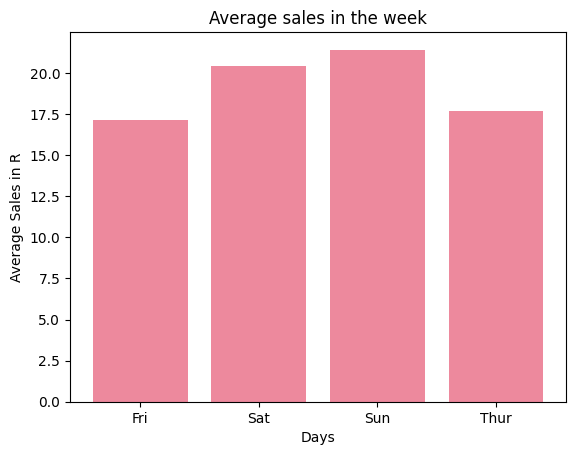

In [41]:
# x-axis = day | y-axis = avg
# x_axis = tips_df['day'].unique()

y_axis = tips_df.groupby('day')['total_bill'].mean()
x_axis = y_axis.index

plt.bar(x_axis, y_axis, color="crimson", alpha=0.5)
plt.xlabel("Days")
plt.ylabel("Average Sales in R")
plt.title("Average sales in the week")

<Axes: title={'center': 'Average sales in a week'}, xlabel='days', ylabel='Average in R'>

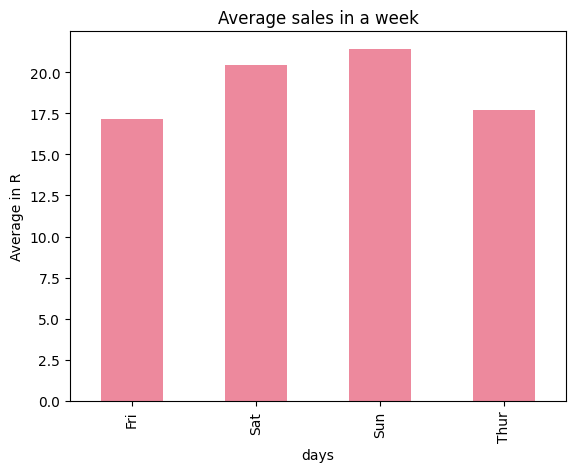

In [45]:
# Easier way

y_axis = tips_df.groupby('day')['total_bill'].mean()
x_axis = y_axis.index

# Series - lengthy and not preferred 
y_axis.plot(kind="bar", xlabel="days", ylabel="Average in R", title="Average sales in a week", color="crimson", alpha= 0.5)

<Axes: title={'center': 'Average sales in a week'}, ylabel='total_bill'>

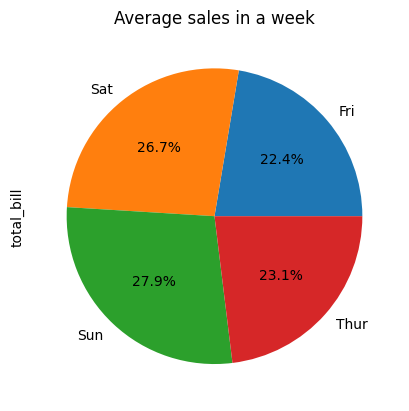

In [48]:
# Pie chart - people don't prefer it because not clear 

y_axis.plot(kind="pie", autopct='%1.1f%%' ,title="Average sales in a week")

<Axes: title={'center': 'Proportion of meals'}, ylabel='time'>

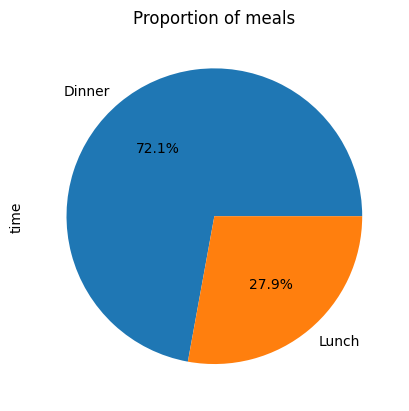

In [55]:
# task - create a pie chart comparing how many times people have visited on what time of the day

y = tips_df.groupby('time')['time'].count()
x = y.index

y.plot(kind="pie", autopct='%1.1f%%' ,title="Proportion of meals")

<Axes: title={'center': 'Proportion of meals'}, ylabel='count'>

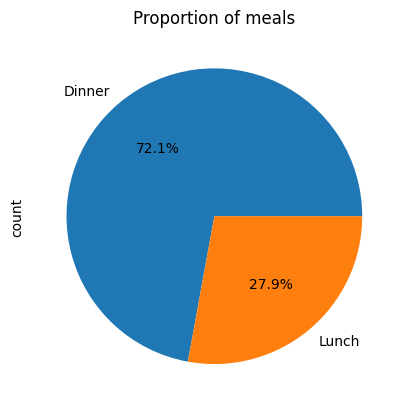

In [60]:
times_visited = tips_df['time'].value_counts()
times_visited.plot(kind="pie",autopct='%1.1f%%' ,title="Proportion of meals")

Text(0, 0.5, 'Tip percentage %')

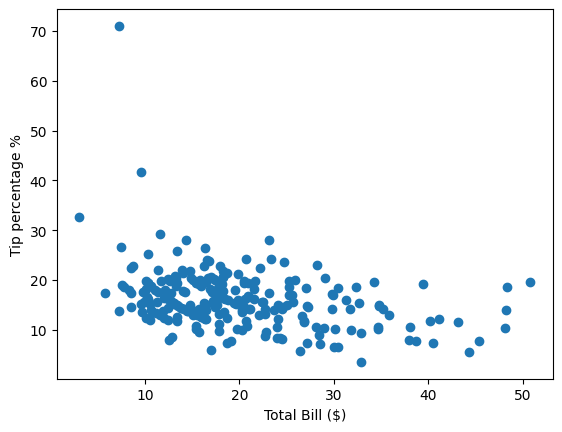

In [62]:
# scatter plot 

plt.scatter(tips_df['total_bill'], tips_df['tipping_percentage'])
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip percentage %')

Text(0, 0.5, 'Frequency')

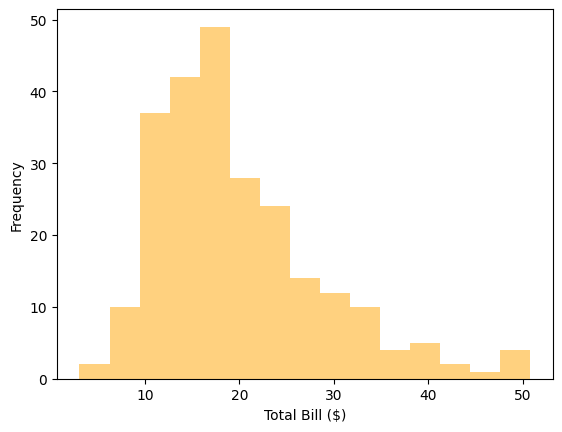

In [67]:
# histograms
# total_bill -> x axis
# frequency -> y axis

plt.hist(tips_df['total_bill'], color="orange", alpha=0.5, bins=15)
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')

## Seaborn

C:\Users\E1005283\AppData\Local\Temp\ipykernel_9816\2300597617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data= tips_df, palette="pastel") # automatically understood to do average


Text(0.5, 1.0, 'Average sales in the week')

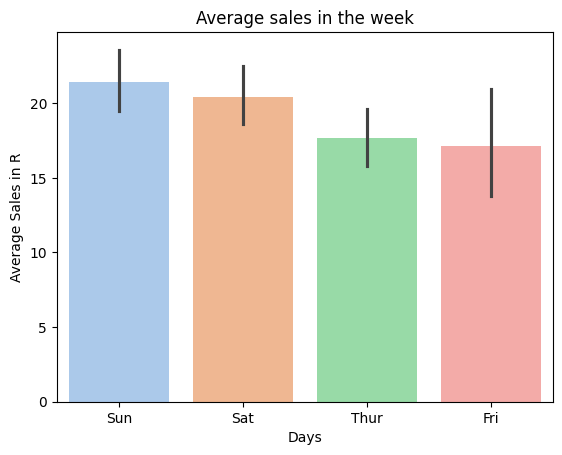

In [70]:
# x -> day vs y -> total_bill

# Average total_bill vs day
sns.barplot(x='day', y='total_bill', data= tips_df, palette="pastel") # automatically understood to do average 
# candle reads max and min
plt.xlabel("Days")
plt.ylabel("Average Sales in R")
plt.title("Average sales in the week")

Text(0, 0.5, 'Tip (R)')

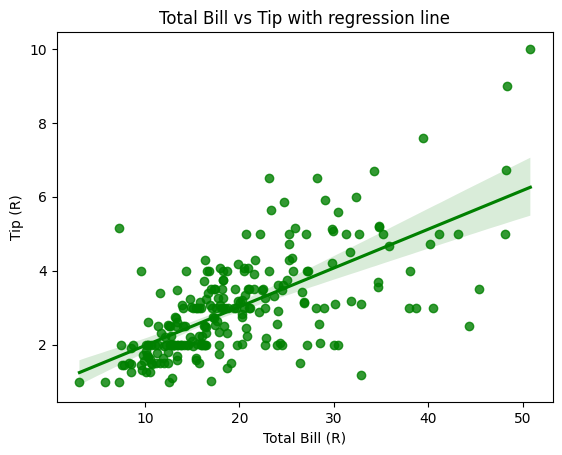

In [78]:
sns.regplot(x="total_bill", y='tip', data=tips_df, color='green')
plt.title('Total Bill vs Tip with regression line')
plt.xlabel("Total Bill (R)")
plt.ylabel('Tip (R)')